In [1]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as spla

In [3]:
Ddata = np.loadtxt('factorization_data/measurement_matrix.txt')

In [4]:
Ddata = np.array(Ddata)
m = np.size(Ddata,0)
n = np.size(Ddata,1)
m = int(m/2)


In [6]:
Dmean = np.mean(Ddata, axis = 1)

Done = np.ones(n)
Done = Done.reshape(-1,1)


D = Ddata - (Done*Dmean.T).T 
D_centrl = Ddata - np.mean(Ddata, axis = 1, keepdims = True)


In [7]:

U,s,Vt = np.linalg.svd(D, full_matrices = False)


In [8]:

U_3 = U[:,:3]
s_3 = s[:3];
V_3 = Vt[:3,:]
print(s_3)
print(U_3.shape)
print(V_3.shape)

[15830.96965136 13712.91580108  1552.96253721]
(202, 3)
(3, 215)


In [13]:
W_3 = np.diag(np.sqrt(s_3))
print(W_3)
A = np.dot(U_3,W_3)
X = np.dot(W_3,V_3)

print(A)


[[125.82118125   0.           0.        ]
 [  0.         117.10215968   0.        ]
 [  0.           0.          39.40764567]]
[[ 7.18436066  8.86407499  3.35754122]
 [ 9.89478243 -6.61636926 -5.3446243 ]
 [ 7.16380047  8.90171056  3.28818146]
 [ 9.91932048 -6.58703545 -5.34423888]
 [ 7.12184482  8.94889769  3.2435707 ]
 [ 9.96458617 -6.55811621 -5.23335014]
 [ 7.07836895  8.9984123   3.2029647 ]
 [10.01518695 -6.5280873  -5.12625564]
 [ 7.03540693  9.04405825  3.15486741]
 [10.05834134 -6.49842759 -5.01804867]
 [ 6.99153261  9.09143048  3.10806271]
 [10.10143897 -6.46693074 -4.90980302]
 [ 6.94819161  9.13707703  3.06465795]
 [10.14604034 -6.43650909 -4.79765041]
 [ 6.90455741  9.18449524  3.01636842]
 [10.18943633 -6.40459708 -4.69305805]
 [ 6.86241255  9.23114937  2.96869678]
 [10.23316839 -6.37440694 -4.58423658]
 [ 6.81741992  9.27641055  2.91428015]
 [10.27456376 -6.33967767 -4.47864532]
 [ 6.77119327  9.3228985   2.864951  ]
 [10.3163217  -6.30593998 -4.36745797]
 [ 6.72787104  

In [37]:

M = np.zeros((3*m,9));
b = np.zeros((3*m,1));
for i in range(m):
    a1 = A[2*i,:]
    a2 = A[2*i+1,:]
    M[3*i,:] = [a1[0]*a1[0], a1[0]*a1[1], a1[0]*a1[2], a1[1]*a1[0], a1[1]*a1[1], a1[1]*a1[2], a1[2]*a1[0], a1[2]*a1[1], a1[2]*a1[2]];
    M[3*i+1,:] = [a2[0]*a2[0], a2[0]*a2[1], a2[0]*a2[2], a2[1]*a2[0], a2[1]*a2[1], a2[1]*a2[2], a2[2]*a2[0], a2[2]*a2[1], a2[2]*a2[2]];
    M[3*i+2,:] = [a1[0]*a2[0], a1[0]*a2[1], a1[0]*a2[2], a1[1]*a2[0], a1[1]*a2[1], a1[1]*a2[2], a1[2]*a2[0], a1[2]*a2[1], a1[2]*a2[2]];
    b[3*i] = 1;
    b[3*i+1] = 1;
    b[3*i+2] = 0;
    
    
def solv_nonsq(matrix, value):
    Q, R = la.qr(matrix)

    x = spla.solve_triangular(R, Q.T.dot(value), lower=False)
    return x
    



L = solv_nonsq(M,b)
L = (L.reshape(3,3) + L.reshape(3,3).T)/2;

Q = np.linalg.cholesky(L)
print(Q)

[[0.0816604  0.         0.        ]
 [0.00489435 0.08216031 0.        ]
 [0.0006352  0.00764566 0.04707844]]


[[ -64.17626244 -116.95383622 -112.07931694 ...  -41.50128851
   -71.2833799  -137.20968353]
 [   5.62935535  -12.34083518  -34.97099578 ... -120.39082083
   169.2548706    37.43011632]
 [ -64.08966474 -117.1187659  -112.00619146 ...  -41.15246589
   -72.24380706 -137.75962416]
 ...
 [ -32.37836116  -40.8001854   -77.31947813 ... -129.98183395
   175.34969382   21.44782693]
 [ -45.89042525 -118.6748518   -92.11873868 ...  -10.71513311
  -144.65948583 -171.10729224]
 [ -32.65673507  -40.86852851  -77.49619975 ... -129.81341618
   175.2532461    21.45533078]]
[[245.   192.   201.   ... 264.   236.   176.  ]
 [281.   263.   243.   ... 154.   443.   318.  ]
 [245.34 192.15 201.17 ... 263.95 235.51 175.38]
 ...
 [258.63 250.27 212.03 ... 162.19 466.82 311.19]
 [257.22 184.28 208.67 ... 294.9  159.34 129.84]
 [258.33 250.17 211.88 ... 162.32 466.73 311.17]]


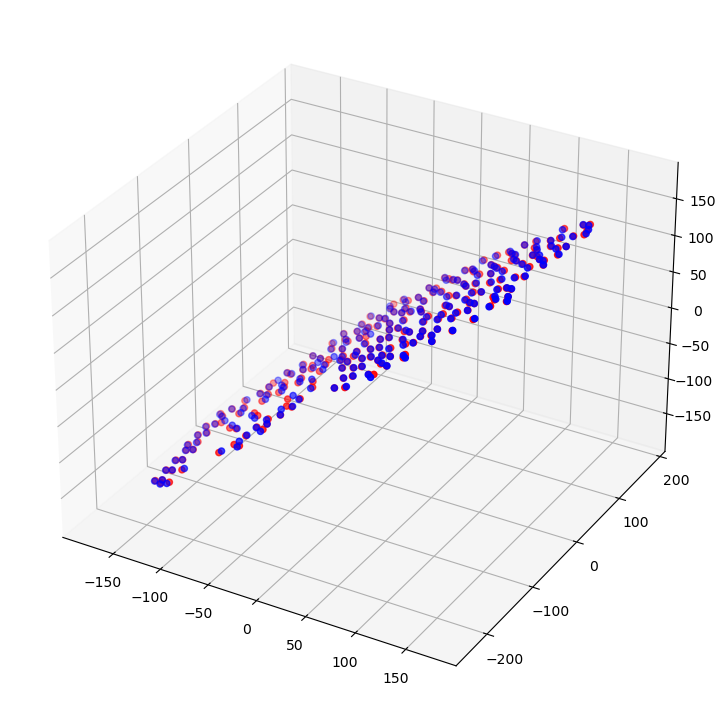

In [54]:
import matplotlib.pyplot as plt



updated_X = solv_nonsq(Q,X)

D_decomp_ortho = (A @ Q ) @ updated_X
print(D_decomp_ortho)

print(Ddata)
fig = plt.figure(figsize=(20,20))
ax = plt.subplot(211, projection='3d')
ax.scatter(D_centrl[0,:], D_centrl[1,:], D_centrl[2,:], c= 'b', zorder=1)

ax.scatter(D_decomp_ortho[0,:], D_decomp_ortho[1,:], D_decomp_ortho[2,:], c ='r', zorder=2)










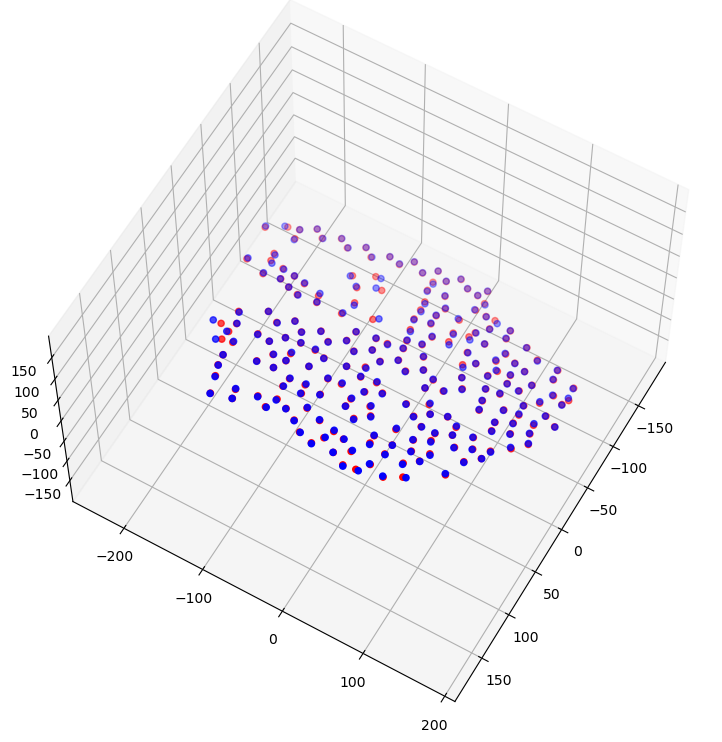

In [55]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(20,20))

ax = plt.subplot(211, projection='3d')
ax.scatter(D_centrl[0,:], D_centrl[1,:], D_centrl[2,:], c= 'b', zorder=1)
ax.scatter(D_decomp_ortho[0,:], D_decomp_ortho[1,:], D_decomp_ortho[2,:], c ='r', zorder=2)

ax.view_init(60, 30)

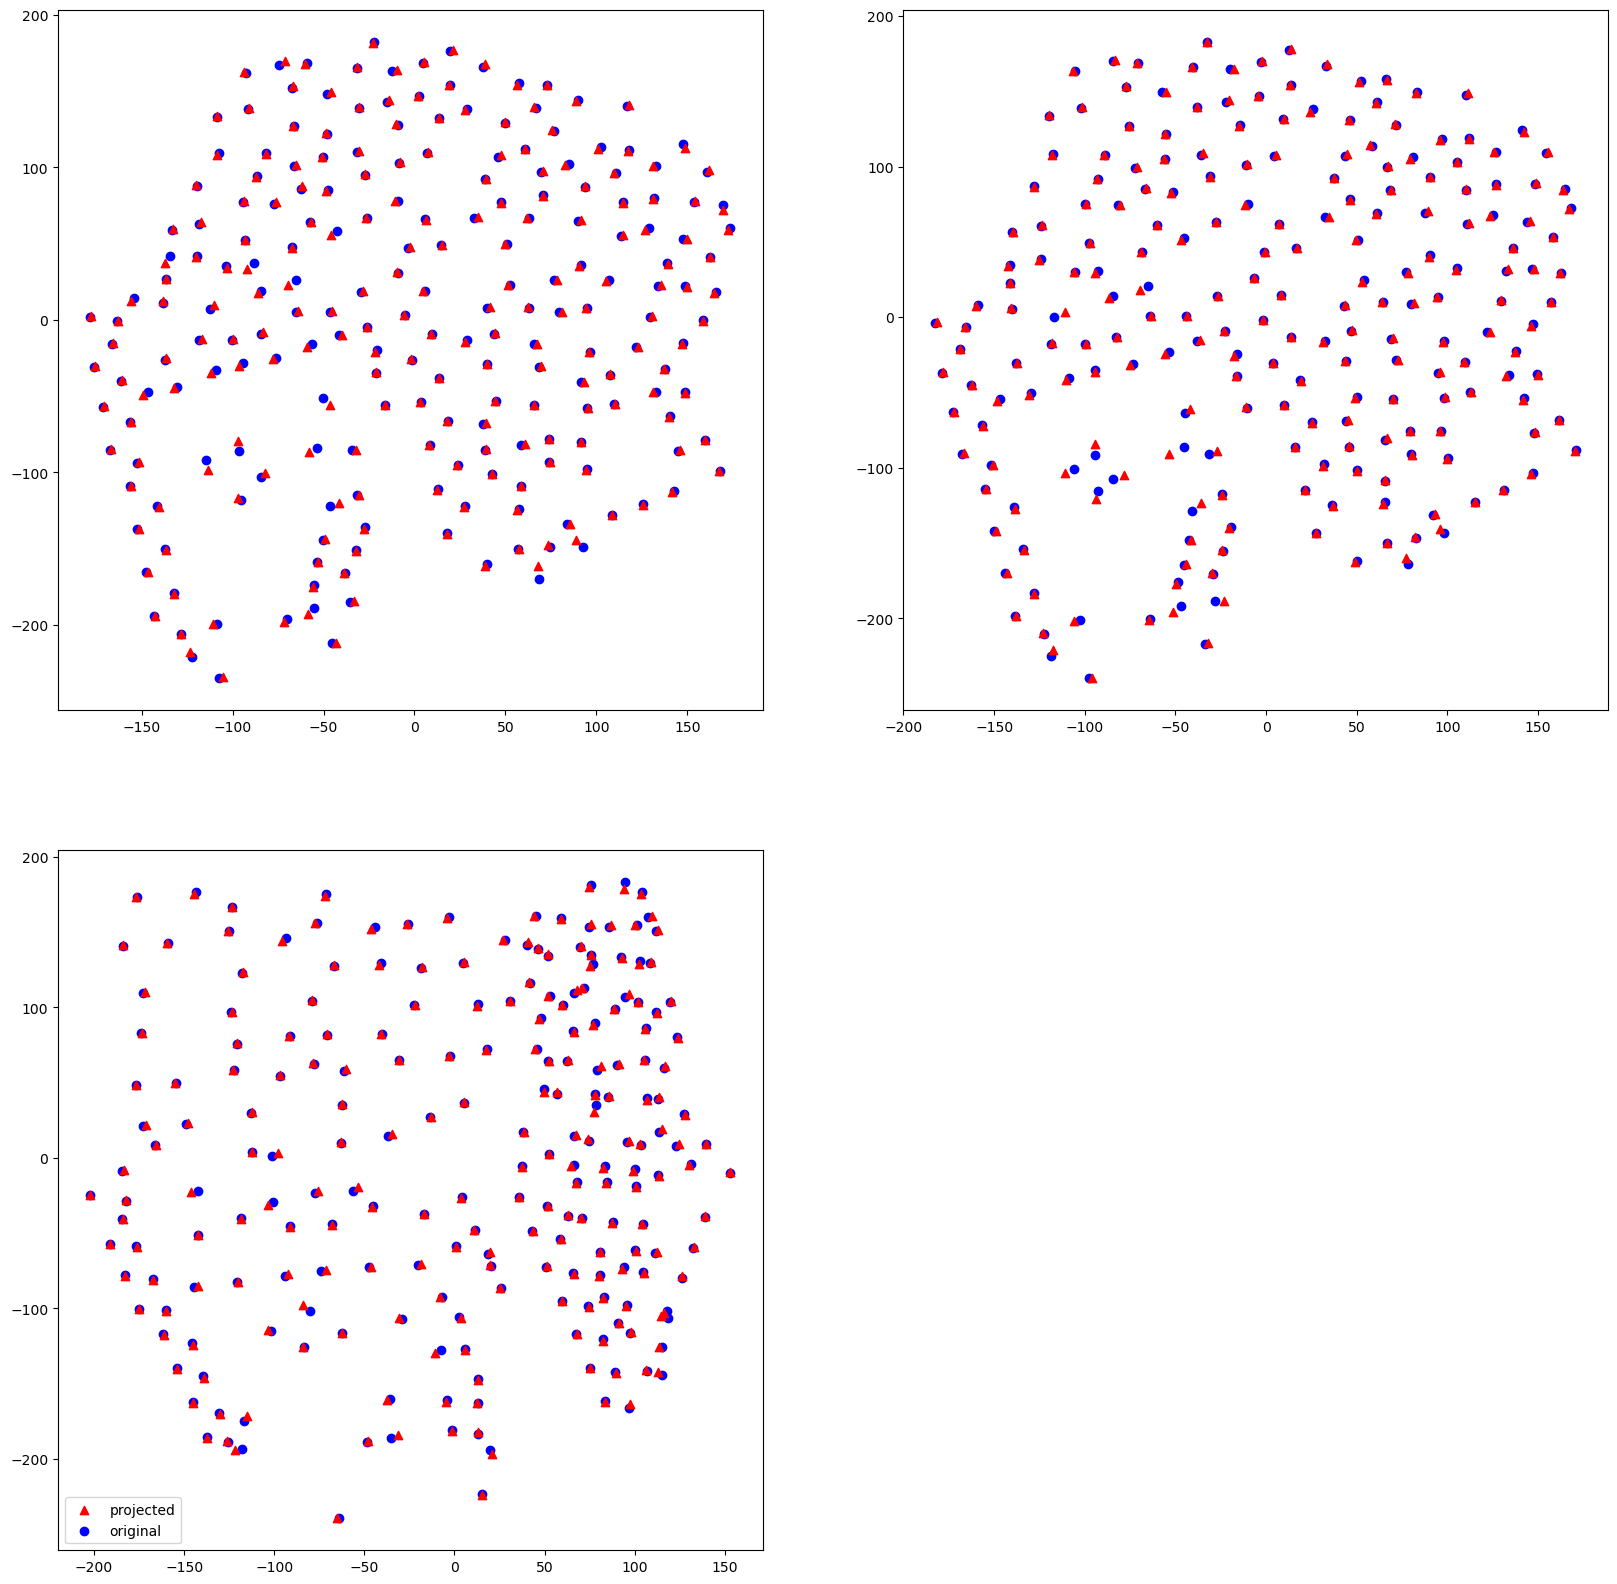

In [57]:
fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot(221)

dots2 = ax1.scatter(D_centrl[0,:], D_centrl[1,:],  c='b', label = 'blue:original')
dots1 = ax1.scatter(D_decomp_ortho[0,:], D_decomp_ortho[1,:], marker='^', c = 'r', label = 'red:projected')
ax1 = plt.subplot(222)

ax1.scatter(D_centrl[20,:], D_centrl[21,:],  c='b')
ax1.scatter(D_decomp_ortho[20,:], D_decomp_ortho[21,:], marker='^', c = 'r')

ax1 = plt.subplot(223)

ax1.scatter(D_centrl[200,:], D_centrl[201,:],c='b')
ax1.scatter(D_decomp_ortho[200,:], D_decomp_ortho[201,:], marker='^', c = 'r')

ax1.legend([dots1, dots2], ['projected','original'])